In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
data = pd.read_csv(r'/content/spam.csv')
data.head()


,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Label      5572 non-null   object
 1   EmailText  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.describe()

,Label,EmailText
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Model Accuracy: 0.9691313711414213
Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98      2388
        spam       1.00      0.79      0.88       398

    accuracy                           0.97      2786
   macro avg       0.98      0.89      0.93      2786
weighted avg       0.97      0.97      0.97      2786

Confusion Matrix:
 [[2387    1]
 [  85  313]]


<ipython-input-6-02b19fa32099>:15: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  n = pd.value_counts(data["Label"], sort=True)


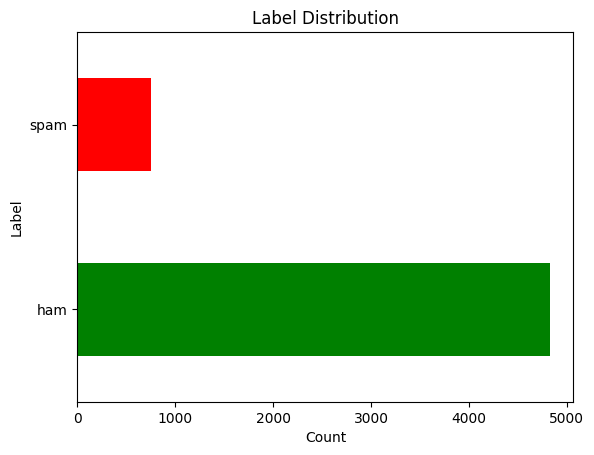

In [ ]:
X = data['EmailText'].values
y = data['Label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)
classifier = SVC(kernel='rbf', random_state=10) # rbf -> Radial Basis Function
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
n = pd.value_counts(data["Label"], sort=True)
n.plot(kind='barh', color=["green", "red"])
plt.title('Label Distribution')
plt.xlabel('Count')
plt.ylabel('Label')
plt.show()